In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [387]:
def four_heatcond(k, T):
    k = k * .0018 # represents insulating housing around the transit box
    Q = k * T
    return Q

In [408]:
def find_time(Q, T):
    T = 8
    t = ((m * cp) * ((T - T_in))) / Q  # time to reach T

    return t

In [409]:
k_lip = .2 # W/mK
k_poly = .3 # W/mK
k_lipchol = .1 # W/mK

temps = np.linspace(8, 30, 45) # storage temps 

In [410]:
T_in = 2 # initial temp
cp = 2 # J/gK
m = 20.1 # g of drug

data = pd.DataFrame()

for temp in temps:
    q_list = np.empty(0)

    for k in [k_poly, k_lip, k_lipchol]:
        Q = four_heatcond(k, temp)
        t = find_time(Q, temp)

        q_list = np.append(q_list, t)

    q_list = np.append(q_list, temp)

    data = pd.concat([data, pd.Series(q_list)], axis=1)

data = data.T
        

In [411]:
# convert data from seconds to hours
data = data / 3600

data.columns = ['Polymer', 'Lipid', 'Lipid-Cholesterol', 'Temperature']
data['Temperature'] = temps

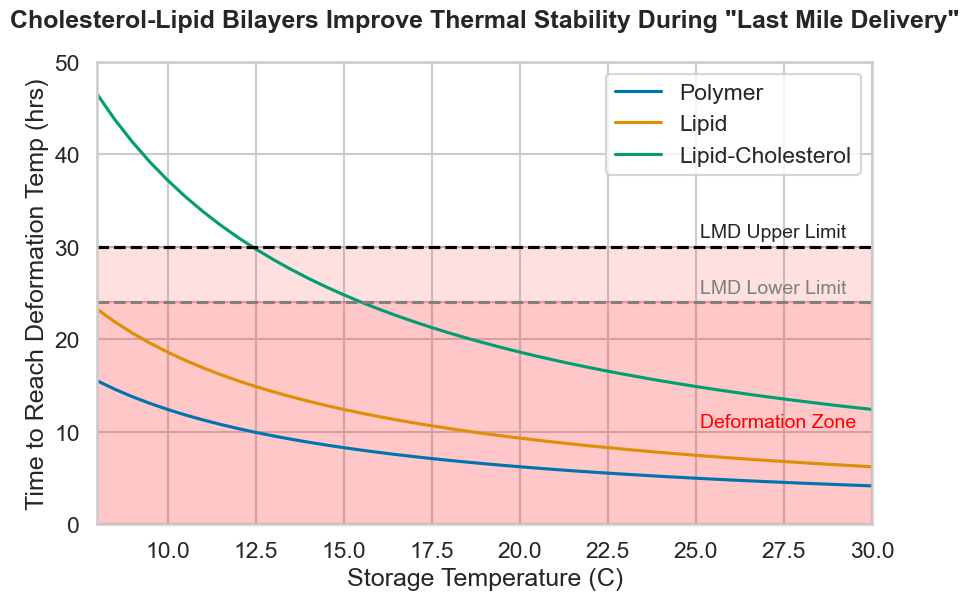

In [412]:
# use seaborn to plot
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("colorblind")

# plot the time it takes each material to reach the storage temperature
plt.figure(figsize=(10, 6))
sns.lineplot(x='Temperature', y='Polymer', data=data, label='Polymer')
sns.lineplot(x='Temperature', y='Lipid', data=data, label='Lipid')
sns.lineplot(x='Temperature', y='Lipid-Cholesterol', data=data, label='Lipid-Cholesterol')
# set the y axis to a log scale 
plt.yscale('linear')
plt.ylim(0, 50)
plt.xlim(8, 30)

plt.xlabel('Storage Temperature (C)')
plt.ylabel('Time to Reach Deformation Temp (hrs)')

# shade the areas under 30 hours red to represent the 'deformation zone'
plt.fill_between(data['Temperature'], 24, 30, color='red', alpha=0.12)
plt.fill_between(data['Temperature'], 24, 0, color='red', alpha=0.22)
plt.text(25.1, 10.5, 'Deformation Zone', fontsize=14, color='red')

# add a horizontal line at 30 hours and mark it as the 'last mile delivery' time
plt.axhline(y=30, color='black', linestyle='--')
plt.text(25.1, 31, 'LMD Upper Limit', fontsize=14)

plt.axhline(y=24, color='grey', linestyle='--')
plt.text(25.1, 25, 'LMD Lower Limit', fontsize=14, color='grey')

# increase font size of the title and make it bold

plt.title('Cholesterol-Lipid Bilayers Improve Thermal Stability During "Last Mile Delivery"\n', fontsize=18, fontweight='bold')
plt.legend()
plt.show()